## First attempt for predicting housing prices.

### 1. Exploratory data analysis

In [59]:
# import necessary libraries and load the data
import numpy as np
import pandas as pd

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
# Drop Id feature, since it is not related.
train_df.drop('Id', axis = 1, inplace = True)
test_df.drop('Id', axis = 1, inplace = True)
# take a breif look at the data
print(train_df.head())
train_df.describe()
print(train_df.shape)

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside    ...            0    NaN   NaN   
1         Lvl    AllPub       FR2    ...            0    NaN   NaN   
2         Lvl    AllPub    Inside    ...            0    NaN   NaN   
3         Lvl    AllPub    Corner    ...            0    NaN   NaN   
4         Lvl    AllPub       FR2    ...            0    NaN   NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NaN       0      2    2008        WD         Normal     208500  
1       

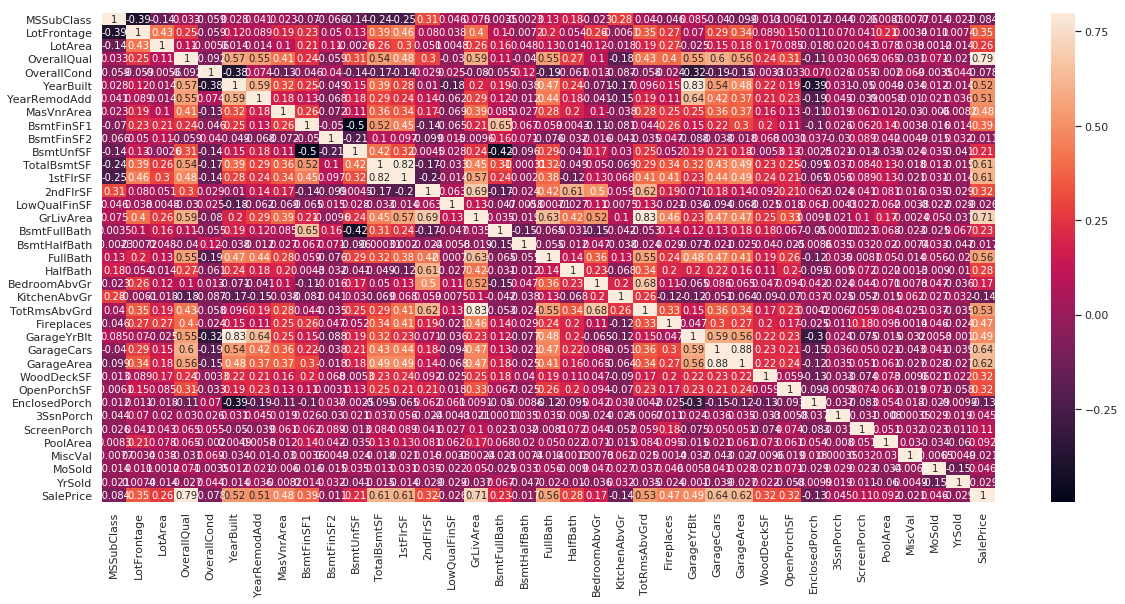

In [50]:
# visualize the correlations among features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = train_df.corr()  # calculate the correlations
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)  # produce heatmap 

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')
OverallQual


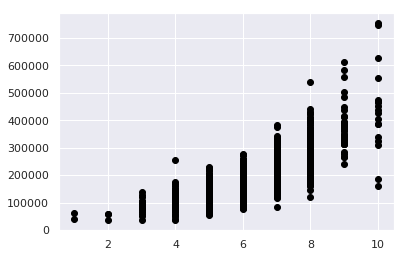

GrLivArea


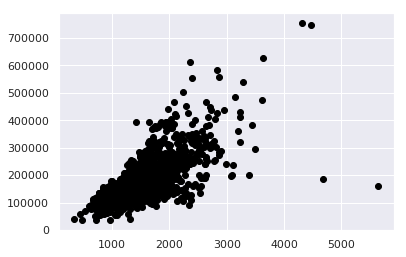

GarageCars


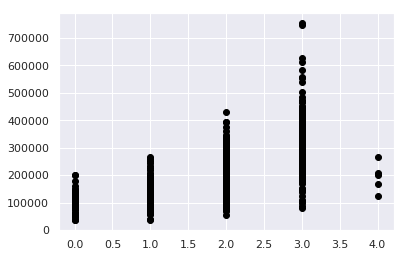

GarageArea


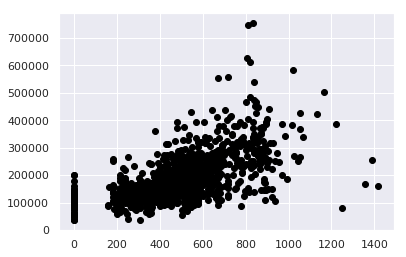

TotalBsmtSF


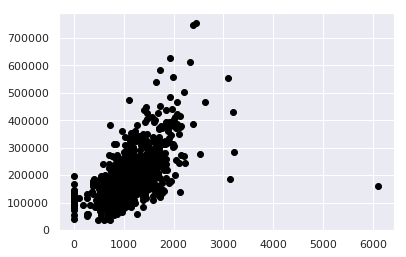

1stFlrSF


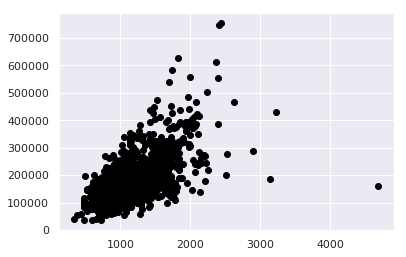

FullBath


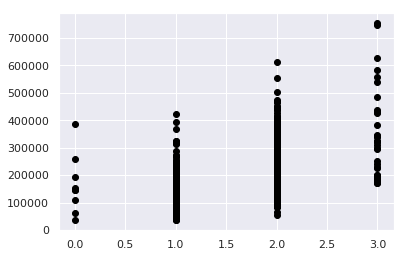

TotRmsAbvGrd


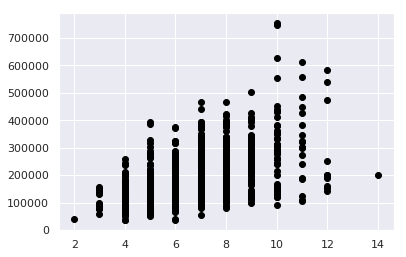

YearBuilt


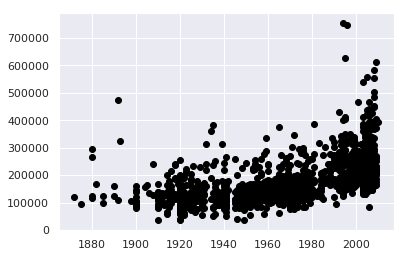

YearRemodAdd


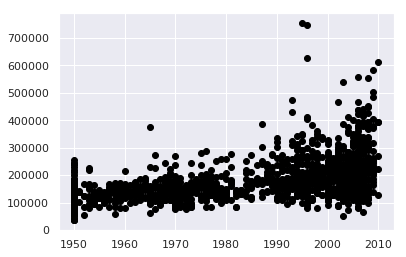

In [51]:
corrmat['SalePrice'][abs(corrmat['SalePrice']) > 0.5].sort_values()
most_related_features = corrmat['SalePrice'][abs(corrmat['SalePrice']) > 0.5].sort_values(ascending=False).index
print(most_related_features)
for f in range(1, len(most_related_features)):
    print(most_related_features[f])
    plt.scatter(y = train_df['SalePrice'],x = train_df[most_related_features[f]],c = 'black')
    plt.show()

In [56]:
# Get rid of outliers
# (1) get rid of the two samples in GrLivArea that more than 4000 sf and less than 220000 dollars
print(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<220000)].index)
train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<220000)].index, inplace=True)

# (2) get rid of the 4 samples in GarageArea where they are more than 1200 and less than 300000 dollars.
print(train_df[(train_df['GarageArea']>1200) & (train_df['SalePrice']<300000)].index)
train_df.drop(train_df[(train_df['GarageArea']>1200) & (train_df['SalePrice']<300000)].index, inplace=True)

# (3) get rid of the 1 sample in TotalBasmtSF where it is more than 6000 sf.
print(train_df[(train_df['TotalBsmtSF']>6000)].index)
train_df.drop(train_df[(train_df['TotalBsmtSF']>6000)].index, inplace=True)

# (4) get rid of the 1 sample in 1stFlrSF where it is more than 4000 sf.
print(train_df[(train_df['1stFlrSF']>4000)].index)
train_df.drop(train_df[(train_df['1stFlrSF']>4000)].index, inplace=True)


Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [58]:
train_df.shape

(1455, 80)

We also need to check the distribution of the target SalePrice. If they are not well distributed, we need to take some actions.

/home/han/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



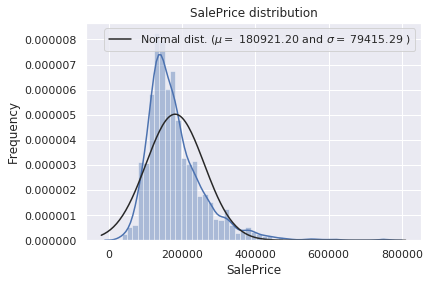

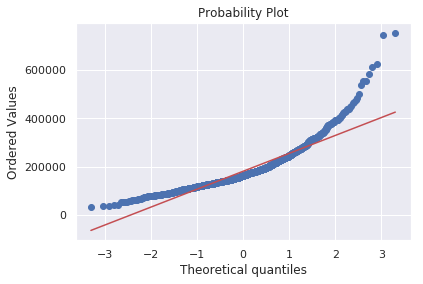

In [61]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



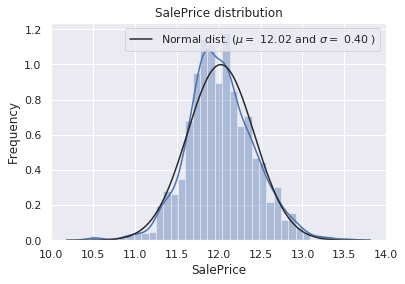

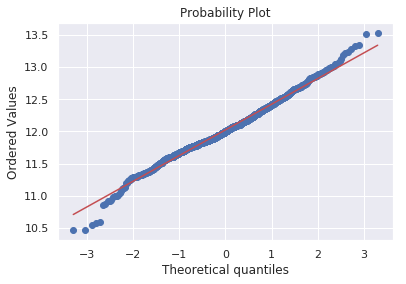

In [62]:
# Take log of the target values to prevent skewness
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution 
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()


### 2. Next, we need to clean the data, do some necessary feature engineering, and preprocess data.

(1) Data cleaning:
    a. Detect if there are some abnormal data (e.g. negative value, no value).
    b. Some NA values mean No in some columns.
    c. For abnormal negative values, we can use some statistical methods to fill values.
    d. For string values, we need to convert them into one-hot encoding.
    e. For some number values llike years, we need to put them into bins (windows).

In [2]:
for c in raw_df.columns:
    num_na = raw_df[c].isnull().sum()
    if num_na > 0 and raw_df[c].dtype != object:
        print('column', c, 'has', str(num_na), 'null values.')

column LotFrontage has 259 null values.
column MasVnrArea has 8 null values.
column GarageYrBlt has 81 null values.


Found 3 columns have abnormal null values for numerical columns. We can use a statistical way to handle this, e.g. use the mean of similar data.<br>
LotFrontage means the linear feed from a street. If value is null, we can use the mean or interpolation of the lot area size to fill values here.<br>
MasVnrArea means the masonry veneer area. We can use the mean of the area size of the same type of masonary to replace NA values. <br>
GarageYrBlt means the year that the garage been built. We can use mean of the same type of garage to fill the values for them. <br>

In [3]:
# Check the LotFrontage column and interpolate the value with linear relationship with lot area size.
# pd.isnull(raw_df['LotFrontage'][7])
la_max, la_min = raw_df['LotArea'].max(), raw_df['LotArea'].min()
lf_max, lf_min = raw_df['LotFrontage'].max(), raw_df['LotFrontage'].min()
lf_df = raw_df['LotFrontage'].copy()
for i in range(lf_df.size):
    if pd.isnull(lf_df[i]):
        lf_df[i] = ((raw_df['LotArea'][i] - la_min) / (la_max - la_min))*(lf_max - lf_min) + lf_min

lf_df.describe()

count    1460.000000
mean       64.214674
std        27.012433
min        21.000000
25%        44.971161
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [4]:
# check MasVnrArea and fill the NA values with mean values
mvt_mean = raw_df[['MasVnrType', 'MasVnrArea']].groupby('MasVnrType').mean()
all_mvt_mean = raw_df['MasVnrArea'].mean()
# print(mv_max)
# print(mv_min)
# print(mv_mean)

mva_df = raw_df['MasVnrArea'].copy()
for j in range(mva_df.size):
    if pd.isnull(mva_df[j]):
        if raw_df['MasVnrType'][j] in mvt_mean.index:
            mva_df[j] = mvt_mean.iloc(raw_df['MasVnrType'][j])[0]
        else:
            mva_df[j] = all_mvt_mean

print(mva_df.describe())

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [5]:
# check the GarageYrBlt column and use the average year of the same type to estimate the values for NA locations
raw_df['GarageYrBlt'].describe()
sum(raw_df['GarageYrBlt'].isnull() == raw_df['GarageType'].isnull())
# The NA values in GarageType match the NA values in GarageYrBlt. 
# I can use the min value to replace NA values in GarageYrBlt.
gyb_min = raw_df['GarageYrBlt'].min()
gyb_df = raw_df['GarageYrBlt'].copy().fillna(gyb_min)
print(gyb_df.describe())

count    1460.000000
mean     1974.150685
std        29.982047
min      1900.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


(2) Feature Engineering
    a. We can create some new features if they can be helpful.

One obvious new feature that we can add is the total square feet by adding 1stFlrSF, 2ndFlrSF, and TotalBsmtSF.

In [6]:
total_square_feet = raw_df['1stFlrSF'] + raw_df['2ndFlrSF'] + raw_df['TotalBsmtSF']
total_square_feet.describe()

count     1460.000000
mean      2567.048630
std        821.714421
min        334.000000
25%       2009.500000
50%       2474.000000
75%       3004.000000
max      11752.000000
dtype: float64

(3) Preprocess data:
    Scale data between 0 and 1 for numerical values.
    Convert non-numerical values into one-hot encoding.
    Split data into training and testing parts.

In [7]:
# Get all numerical values and scale them between [0, 1].
processed_df = raw_df.copy()
# replace some data by the aboved cleaned data
processed_df['LotFrontage'] = lf_df
processed_df['MasVnrArea'] = mva_df
processed_df['GarageYrBlt'] = gyb_df
# get all nuerical values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
processed_numerical_df = processed_df.select_dtypes(include=numerics)
# processed_numerical_df.describe()
y_df = processed_numerical_df['SalePrice']
processed_numerical_df = processed_numerical_df.drop(columns=['SalePrice'], axis=1)
processed_numerical_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
processed_numerical_df = pd.DataFrame(scaler.fit_transform(processed_numerical_df), columns=processed_numerical_df.columns)
print(processed_numerical_df.describe())
numerical_data = processed_numerical_df.values
print(numerical_data.shape)

/home/han/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/han/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/han/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/han/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


                Id   MSSubClass  LotFrontage      LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.500000     0.217043     0.147995     0.043080     0.566591   
std       0.288972     0.248827     0.092508     0.046653     0.153666   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.000000     0.082093     0.029229     0.444444   
50%       0.500000     0.176471     0.143836     0.038227     0.555556   
75%       0.750000     0.294118     0.198630     0.048150     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.571918     0.719332      0.581096     0.064803     0.078604   
std       0.139100     0.218862      0.344090     0.112856     0.080811   
min       0.000000     0.000000  

In [9]:
# handle non-numerical values
non_numerics = ['object']
processed_object_df = processed_df.select_dtypes(include=non_numerics)
processed_object_df.head()
temp_holder = []

for column in processed_object_df.columns:
    # for each column, convert to one-hot encoding, add to the holder
    temp_df = pd.get_dummies(processed_object_df[column])
    temp_holder.append(temp_df.values)

# temp_holder = np.asarray(temp_holder)
categorical_data = np.concatenate(temp_holder, axis=1)
print(categorical_data.shape)

(1460, 252)


In [10]:
# combine numerical data and categorical data
x = np.concatenate([numerical_data, categorical_data], axis=1)
y = y_df.values
print(x.shape)
print(y.shape)

(1460, 289)
(1460,)


In [11]:
# split data into training and testing two parts
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
# print(x_train.shape)
# print(y_train.shape)

/home/han/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 3. Build the model

(1) Base model: Linear regression. It will serve as a benchmark to beat.

In [12]:
# build the linear regression model and find the best hyperparameters by using grid_search
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
predicted_y = reg_model.predict(x_test)
reg_mse = mean_squared_error(y_test, predicted_y)
print('Linear Regression model MSE is', reg_mse)   # get the mse for the linear regression model

Linear Regression model MSE is 9.388863340235559e+28


/home/han/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(2) A single model: random forest, xgboost, svm regressor, FNN regressor

In [17]:
# First, try a random forest regressor.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
rf_model = RandomForestRegressor()
rf_clf = GridSearchCV(rf_model, parameters, cv=5, scoring='neg_mean_squared_error')
rf_clf.fit(x_train, y_train)
final_rf_model = rf_clf.best_estimator_
print(rf_clf.best_params_)

predicted_y_rf = final_rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, predicted_y_rf)
print('Random Forest model MSE is', rf_mse)   # get the mse for the random forest model

/home/han/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


{'n_estimators': 80}
Random Forest model MSE is 1194037366.3673556


In [16]:
# Second, try a xgboost regressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

dtrain = xgb.DMatrix(x_train, label=y_train)

xgb_parameters = {
    'eta': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'booster': ['gbtree', 'gblinear', 'dart']
}
xgb_regressor = XGBRegressor()
xgb_clf = GridSearchCV(xgb_regressor, xgb_parameters, cv=5, scoring='neg_mean_squared_error')
xgb_clf.fit(x_train, y_train)
final_xgb_model = xgb_clf.best_estimator_
print(xgb_clf.best_params_)

predicted_y_xgb = final_xgb_model.predict(x_test)
xgb_mse = mean_squared_error(y_test, predicted_y_xgb)
print('XGB model MSE is', xgb_mse)   # get the mse for the XGBoost model

{'booster': 'gbtree', 'eta': 0.01}
XGB model MSE is 1286626947.0391731


In [12]:
# Try a FNN regressor by Keras or SKlearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

mlp_parameters = {
    'hidden_layer_sizes':[(100,), (200,), (300,)],
    'activation':['logistic', 'tanh'],
    'solver': ['adam'],
    'learning_rate':['adaptive'],
    'learning_rate_init':[0.001, 0.01, 0.1],
    'max_iter':[200, 300, 400],
    'early_stopping':[True]
}

fnn_model = MLPRegressor()
fnn_clf = GridSearchCV(fnn_model, mlp_parameters, cv=5, scoring='neg_mean_squared_error')
fnn_clf.fit(x_train, y_train)
final_fnn_model = fnn_clf.best_estimator_
print(fnn_clf.best_params_)

predicted_y_fnn = final_fnn_model.predict(x_test)
fnn_mse = mean_squared_error(y_test, predicted_y_fnn)
print('FNN model MSE is', fnn_mse)   # get the mse for the FNN model

/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % sel

/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % sel

/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % sel

/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % sel

{'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 400, 'solver': 'adam'}
FNN model MSE is 21581989964.718758


/home/han/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(3) try an emsemble model: random forst, xgboost, SVM regressor, FNN